In [1]:
import numpy as np
from numpy import sort
import pandas as pd
from sklearn import tree
import scipy
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import confusion_matrix 
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from numpy import array
from sklearn.model_selection import KFold
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib

In [2]:
# import CSVs
train = pd.read_csv('pitchclassificationtrain.csv')
# dropped pitchID (no correlation with label)
# dropped yearID (no variance in varaible; all 3's)
# dropped pitcherID (perfect correlation with height; duplicate essentially)
train = train.drop(columns = ['pitchid','yearid','pitcherid'])
test = pd.read_csv('pitchclassificationtest.csv')
test_features = test.drop(columns = ['pitchid','yearid','pitcherid'])

In [3]:
# separate feature vector from label
train_features = train.drop("type",axis = 1)
train_labels = train.type

In [4]:
# Model on all training 
model = XGBClassifier()
model.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

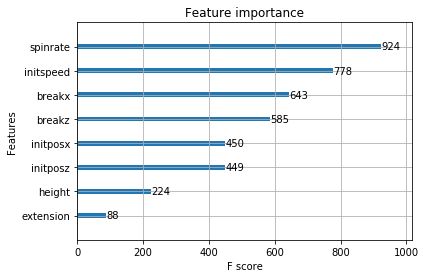

In [5]:
# Feature Importance
plot_importance(model)
pyplot.show()

# Importance: Spin Rate, Initial Speed, h break, v break, h release, v release, height, extension

In [6]:
# Feature Selection using best N features ranked by importance using SelectFromModel
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.33, random_state=7)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [7]:
# Accuracy on 33% of training set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.20%


In [8]:
# Accuracies based on model using n best features, importance wise 
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    
# best: Thresh=0.034, n=7, Accuracy: 93.28%; top 7 features, exclude extension

Thresh=0.005, n=8, Accuracy: 93.20%
Thresh=0.034, n=7, Accuracy: 93.28%
Thresh=0.056, n=6, Accuracy: 92.49%
Thresh=0.070, n=5, Accuracy: 91.75%
Thresh=0.076, n=4, Accuracy: 89.84%
Thresh=0.189, n=3, Accuracy: 87.25%
Thresh=0.212, n=2, Accuracy: 77.46%
Thresh=0.358, n=1, Accuracy: 58.91%


In [9]:
# drop extension, re-analyze (n=7 should have best accuracy)

train_features_no_ext = train_features.drop(columns = ['extension'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_features_no_ext, train_labels, test_size=0.33, random_state=7)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [11]:
# Accuracy on 33% of training set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.28%


In [12]:
# Accuracies based on model using n best features, importance wise 
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    
# best: Thresh=0.034, n=7, Accuracy: 93.28%; top 7 features, exclude extension

Thresh=0.033, n=7, Accuracy: 93.28%
Thresh=0.057, n=6, Accuracy: 92.49%
Thresh=0.070, n=5, Accuracy: 91.75%
Thresh=0.076, n=4, Accuracy: 89.84%
Thresh=0.188, n=3, Accuracy: 87.25%
Thresh=0.215, n=2, Accuracy: 77.46%
Thresh=0.361, n=1, Accuracy: 58.91%


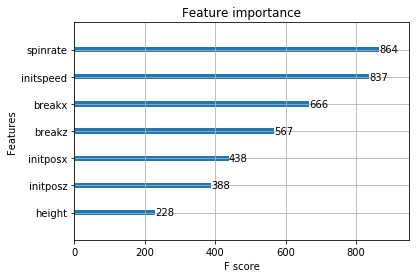

In [13]:
plot_importance(model)
pyplot.show()

# same importance of variables, confirming

In [14]:
# use cross-validation to see imporvement in training accuracy 
kfold = model_selection.KFold(n_splits=10, random_state=1)
model = XGBClassifier()
results = model_selection.cross_val_score(model, train_features, train_labels, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

# 93.28% to  93.341% imporvement!!! (minimal)

Accuracy: 93.341% (0.820%)


In [15]:
# use cross-validation with important features to confirm ommitment of extension
model = XGBClassifier()
results = model_selection.cross_val_score(model, train_features_no_ext, train_labels, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

# slight imporvement: 93.34% to 93.4% but less SD

Accuracy: 93.397% (0.781%)


In [16]:
# Repeated 10-fold cross validation with important feataures 
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=0.33, random_state=1)
model = XGBClassifier()
results = model_selection.cross_val_score(model, train_features_no_ext, train_labels, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.290% (0.274%)


In [17]:
# scaling
normalized_X = preprocessing.normalize(train_features_no_ext)
kfold = model_selection.KFold(n_splits=10, random_state=1)
results = model_selection.cross_val_score(model, train_features_no_ext, train_labels, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

# Accuracy: 93.4% (no significant difference)

Accuracy: 93.397% (0.781%)


In [18]:
# standardizaiton
standardized_X = preprocessing.scale(train_features_no_ext)
kfold = model_selection.KFold(n_splits=10, random_state=1)
results = model_selection.cross_val_score(model, train_features_no_ext, train_labels, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

# Accuracy: 93.4% (no significant difference)

# confirms scaling nor standardization improves DTs

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


Accuracy: 93.397% (0.781%)


In [19]:
# Takeaways: minimal improvement, so stick with original XGBoost
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.20%


In [20]:
y_pred = model.predict(test_features)
predictions = [round(value) for value in y_pred]
test['predictions'] = predictions

In [21]:
test.to_csv("XG_boost.csv")

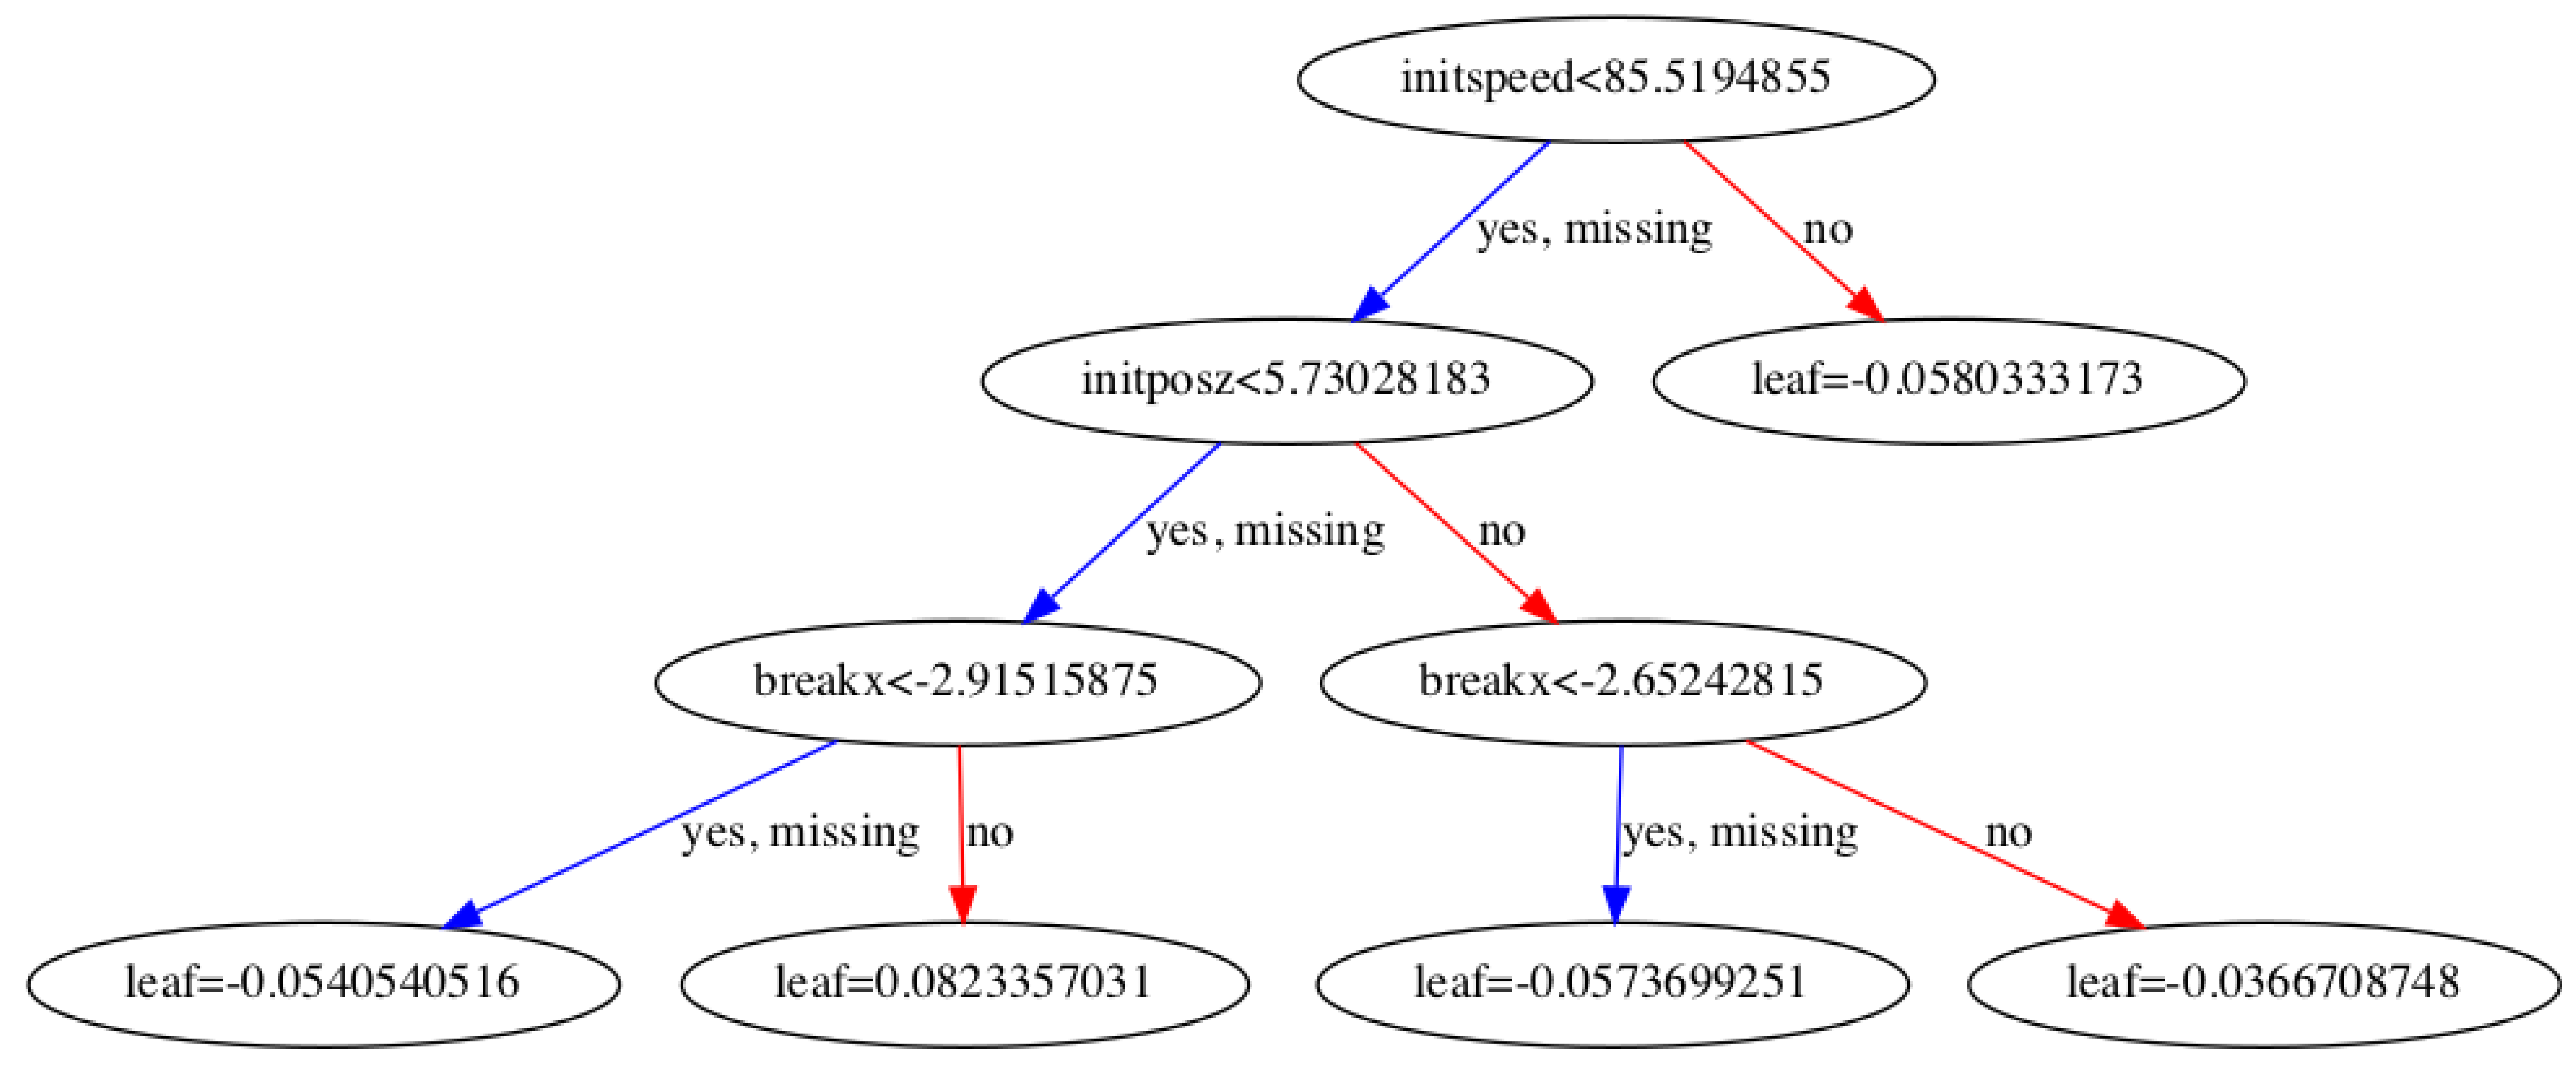

In [22]:
# Visualizing Gradient Boosting Decision Trees With XGBoost

# Graphing most influencial Decision Tree
rcParams['figure.figsize'] = 100,50
plot_tree(model,num_trees=1)
plt.show()



In [23]:
# Stochastic Gradient Boosting with XGBoost
# Column Sub-Sampling (rumored to be the best)
model = XGBClassifier()
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bytree=colsample_bytree)
# Using stratified because
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_features, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(colsample_bytree, means, yerr=stds)
pyplot.title("XGBoost colsample_bytree vs Log Loss")
pyplot.xlabel('colsample_bytree')
pyplot.ylabel('Log Loss')
pyplot.savefig('colsample_bytree.png')

# We can see that the best results achieved were 1, or training trees using a 100% sample of the training dataset.
# Sub-Sampling doesn't add value

KeyboardInterrupt: 